The ntoebook will be very similar to the rates_analysis notebook but will be related to just COWD + companions regardless of if the companion is a white dwarf or not

In [1]:
# let's import things
import h5py as h5 
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')
import sys
import os
from scipy import stats
import seaborn as sns

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 

#### Doing rates analysis on the AIS WD hdf5 output

In [2]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/home/copy_h5_files/v03.08.01/CEalpha025/N1e6_MassiveWDWD_NSNS_CEalpha025_fbinNone.h5'  #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5,"r")

# let's gather the system parameters group 
SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

# Rates info directly taking out the 
merger_SEED = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['SEED'][()]
rates_DCO = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate'][()]
rates_z0_DCO = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate_z0'][()]
DCO_mask = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]
redshifts = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['redshifts'][()]
# rates_info = Data_weights["Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048"]

Data_weights.close()

In [3]:
DCO_data_masked = SP_WD_data[DCO_mask]
DCO_data_masked

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
3,2,4.789722,0.0,0,b'5 ',b'3 ',0.523238,0.206433,1,0.018491,...,11,0.001041,11,10,11466.890939,0.000000e+00,-0.800452,0.0,0.0,1.371936
12,1,1210.556247,0.0,0,b'1-2 ',b'3 ',0.196557,0.425571,1,0.000327,...,37,0.003741,10,10,4922.554668,0.000000e+00,-0.595372,0.0,0.0,5.555556
20,1,244.566730,0.0,0,b'1-2 ',b'3 ',0.142300,0.356740,1,0.003938,...,63,0.002095,10,10,8292.758845,0.000000e+00,-0.601866,0.0,0.0,5.555556
25,1,7.330900,0.0,0,b'1-2 ',b'3 ',0.300198,0.340321,1,0.000482,...,76,0.001105,10,10,1931.286780,0.000000e+00,-1.099276,0.0,0.0,5.554956
28,1,1418.905070,0.0,0,b'2 ',b'3 ',0.254621,0.384078,1,0.000148,...,90,0.004075,10,10,7213.185682,0.000000e+00,-0.541493,0.0,0.0,5.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625941,1,2231.759916,0.0,0,b'2-8 ',b'5-8 ',0.840210,0.695805,1,0.003514,...,999992,0.008885,11,11,503.577855,1.909585e-10,-0.024152,0.0,0.0,0.034426
625942,1,869.124720,0.0,0,b'2 ',b'3 ',0.560940,0.435289,1,0.000144,...,999993,0.005064,11,10,1155.121047,0.000000e+00,-1.267350,0.0,0.0,0.067198
625943,2,5996.255405,0.0,0,b'6 ',b'5 ',0.954008,0.684200,1,0.000624,...,999994,0.011884,11,11,747.222280,0.000000e+00,0.000000,0.0,0.0,0.021176
625945,2,1935.885020,0.0,0,b'6 ',b'3 ',0.968740,0.374726,1,0.008965,...,999996,0.007361,11,10,1492.175665,0.000000e+00,-1.390703,0.0,0.0,0.025371


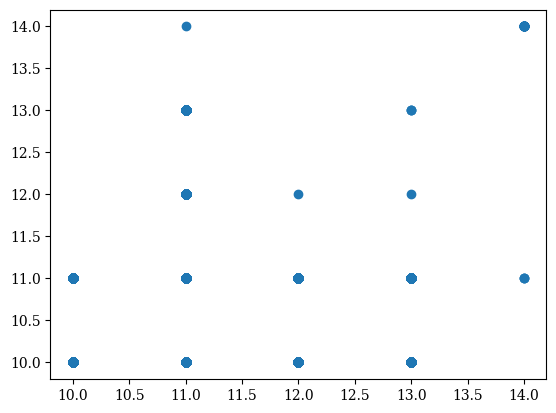

In [4]:
plt.scatter(DCO_data_masked['Stellar_Type(1)'],DCO_data_masked['Stellar_Type(2)'])

In [8]:
# left_over_seeds = np.array(SP_WD_data['SEED']-DCO_data_masked['SEED'])
# left_over_index = np.where(left_over_seeds==0)[0]
# left_over_index
# # DCO_data.iloc[[left_over_index]]
# # DCO_data.iloc[DCO_data['SEED']==left_over_seeds]

In [9]:
# rates = rates_info['merger_rate']

# for i in range(rates_info['merger_rate'][0,:].shape[0]):

#     DCO_data_masked['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]

In [5]:
# let's make sure that at least one of these white dwarfs are COWD
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(DCO_data_masked)
carbon_oxygen_bool = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))
DCO_COWD_data = DCO_data_masked[carbon_oxygen_bool]

In [6]:
# let's gather the NSNS merger information
NSNS_bool = np.logical_and(DCO_data_masked['Stellar_Type(1)']==13,DCO_data_masked['Stellar_Type(2)']==13)
DCO_NSNS_data = DCO_data_masked[NSNS_bool]

In [7]:
DCO_COWD_data

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
3,2,4.789722,0.0,0,b'5 ',b'3 ',0.523238,0.206433,1,0.018491,...,11,0.001041,11,10,11466.890939,0.000000e+00,-0.800452,0.0,0.0,1.371936
40,1,1075.345594,0.0,0,b'2 ',b'3 ',0.327994,0.482210,1,0.000142,...,126,0.004550,11,10,2478.199788,0.000000e+00,-0.796657,0.0,0.0,5.188204
62,1,5221.006713,0.0,0,b'2-8 ',b'5 ',0.787554,0.791719,1,0.000110,...,174,0.011245,11,11,468.179688,0.000000e+00,-1.721241,0.0,0.0,0.036751
65,1,12748.605512,0.0,0,b'2 ',b'5 ',0.528996,0.629757,1,0.002042,...,188,0.011123,11,11,889.248397,0.000000e+00,0.000000,0.0,0.0,0.028517
69,2,0.477192,0.0,0,b'5 ',b'3 ',0.521298,0.203626,1,0.021416,...,194,0.000581,11,10,5105.715559,0.000000e+00,-1.070640,0.0,0.0,2.809251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625941,1,2231.759916,0.0,0,b'2-8 ',b'5-8 ',0.840210,0.695805,1,0.003514,...,999992,0.008885,11,11,503.577855,1.909585e-10,-0.024152,0.0,0.0,0.034426
625942,1,869.124720,0.0,0,b'2 ',b'3 ',0.560940,0.435289,1,0.000144,...,999993,0.005064,11,10,1155.121047,0.000000e+00,-1.267350,0.0,0.0,0.067198
625943,2,5996.255405,0.0,0,b'6 ',b'5 ',0.954008,0.684200,1,0.000624,...,999994,0.011884,11,11,747.222280,0.000000e+00,0.000000,0.0,0.0,0.021176
625945,2,1935.885020,0.0,0,b'6 ',b'3 ',0.968740,0.374726,1,0.008965,...,999996,0.007361,11,10,1492.175665,0.000000e+00,-1.390703,0.0,0.0,0.025371


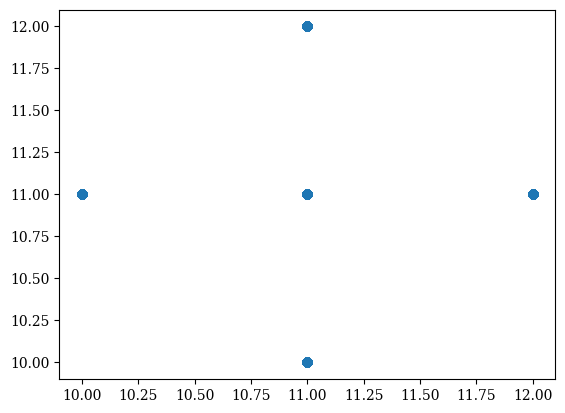

In [8]:
plt.scatter(DCO_COWD_data['Stellar_Type(1)'],DCO_COWD_data['Stellar_Type(2)'])

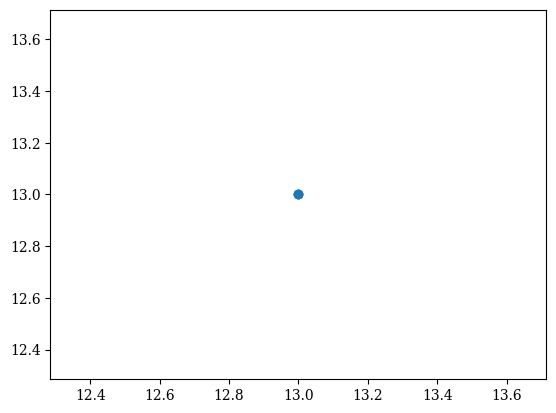

In [9]:
plt.scatter(DCO_NSNS_data['Stellar_Type(1)'],DCO_NSNS_data['Stellar_Type(2)'])

In [12]:
# # what are the stellar types in this system
# print(np.unique(DCO_COWD_data['Stellar_Type(1)']))
# print(np.unique(DCO_COWD_data['Stellar_Type(2)']))

Let's make a dataframe that just selects for at leadt one COWD that is more thatn 0.9 solar masses

Let's also select for WD+NS systems

In [10]:
# let's select just for the COWD with mass greater than 0.9 solar masses 
wd_ns_bool = np.logical_or((np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Stellar_Type(2)']==14)),(np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Stellar_Type(2)']==14)))
DCO_WD_NS = DCO_data_masked[wd_ns_bool]
DCO_WD_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
351462,1,590.192989,0.0,0,b'2-8 ',b'5 ',1.245055,2.557017,1,0.004298,...,602811,0.012209,11,14,26.422166,-1.161618,0.001007,0.0,0.0,0.531145


Getting the total merger rate for a specific redshift

In [11]:
# # the merger rate for COWD of at least 0.9 solar masses
nsns_rate = np.sum(rates_DCO[NSNS_bool],axis=0)

# the merger rate for all systems with at least a COWD
cowd_rate = np.sum(rates_DCO[carbon_oxygen_bool],axis=0)


In [12]:
# extracting the redshifts and rates from Briel et al
# units in the appendix should be in h^-3 y^-1 Gpc^-3 so we must convert below to get yr^-1 Gpc^-3
h_little = 0.6766

redshifts_briel = [
    0, 0.01, 0.03, (0.025+0.050)/2, 0.073, (0.05+0.15)/2, (0.075+0.125)/2, 0.11, 0.11, 0.13, 
    0.15, (0.125+0.175)/2, 0.16, (0.175+0.225)/2, 0.2, 0.25, (0.15+0.35)/2, (0.225+0.275)/2, 
    0.26, 0.3, (0.275+0.325)/2, 0.35, 0.35, 0.42, 0.44, 0.45, 0.45, (0.35+0.55)/2, 0.46, 0.47, 
    0.47, 0.55, 0.55, 0.55, 0.62, 0.65, (0.55+0.75)/2, 0.65, 0.74, 0.75, 0.75, 0.75, 0.8, 0.83, 0.85, 
    0.85, 0.94, 0.95, 0.95, 1.05, 1.1, 1.14, 1.21, 1.23, 1.25, 1.59, 1.61, 1.69, 1.75, 2.25
]

rates_briel = [
    0.77, 0.82, 0.82, 0.81, 0.71, 1.60, 0.76, 1.08, 0.72, 0.58, 0.93, 0.90, 0.41, 1.01, 0.58,
    1.05, 1.14, 1.06, 0.82, 0.99, 1.27, 0.99, 1.05, 1.34, 0.76, 0.90, 1.05, 1.52, 1.40, 1.22, 
    2.33, 0.93, 1.40, 1.52, 3.76, 1.40, 2.01, 1.43, 2.30, 1.49, 1.98, 1.69, 2.45, 3.79, 2.27, 
    1.66, 1.31, 2.22, 2.24, 2.30, 2.16, 2.06, 3.85, 2.45, 1.87, 1.31, 1.22, 2.97, 2.10, 1.43
]

# converting the rates to the correct units
rates_briel = np.array(rates_briel)
converted_rates_briel = (rates_briel*(10**5))*(h_little**3)

## uncertainties
lower_limits = [
    -0.10, -0.26, -0.32, -0.24, -0.08, -0.85, -0.13, -0.29, -0.20, -0.18, -0.67, -0.10, -0.26, -0.09, 
    -0.23, -0.76, -0.35, -0.08, -0.20, -0.44, -0.10, -0.55, -0.17, -0.93, -0.39, -0.44, -0.17, -0.38, 
    -0.50, -0.17, -0.79, -0.41, -0.17, -0.26, -1.66, -0.15, -0.52, -0.50, -1.20, -0.55, -0.61, -0.17, 
    -0.54, -0.79, -0.64, -0.15, -0.55, -0.73, -0.23, -0.82, -0.35, -0.53, -0.85, -0.82, -0.64, -0.64, 
    -0.67, -1.08, -0.87, -1.11
]

lower_limits = np.array(lower_limits)
converted_lower_limits = (lower_limits*(10**5)*(h_little**3))

upper_limits = [
    0.10, 0.26, 0.32, 0.33, 0.08, 1.46, 0.15, 0.29, 0.08, 0.20, 0.67, 0.11, 0.26, 0.09, 0.23,
    1.75, 0.38, 0.09, 0.20, 0.47, 0.11, 0.55, 0.17, 1.22, 0.67, 0.44, 0.17, 0.32, 0.50, 0.17, 
    1.08, 0.41, 0.17, 0.29, 2.57, 0.15, 0.55, 0.50, 0.96, 0.79, 0.61, 0.17, 0.67, 0.96, 0.64, 
    0.15, 0.64, 0.73, 0.23, 0.82, 0.35, 0.70, 1.05, 0.73, 0.90, 0.99, 1.14, 1.57, 1.31, 2.77
]

upper_limits = np.array(upper_limits)
converted_upper_limits = (upper_limits*(10**5)*(h_little**3))

# multiplied the lower errors by -1 so make them positive to avoid the plt.errorbar error 
y_error = [-1*(converted_lower_limits), converted_upper_limits]
# y_error = [converted_rates_briel+ converted_lower_limits, converted_rates_briel + converted_upper_limits]
# converted_y_error = y_error*(10**5)*(0.6766)

# error_bars = y_error


(1000, 1000000)

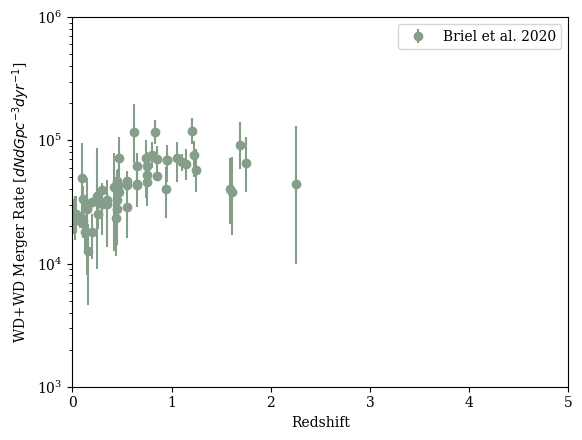

In [13]:
# testing to make sure the Briel et al. rates look good

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A',label='Briel et al. 2020')

plt.yscale('log')
plt.ylabel(r"WD+WD Merger Rate [$dNdGpc^{-3}dyr^{-1}$]")
plt.xlabel(r"Redshift")
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()
plt.xlim(0,5)
plt.ylim(10**3,10**6)

In [19]:
nsns_rate

array([0.10137498, 0.10448705, 0.10794084, 0.11147057, 0.11332981,
       0.11697624, 0.12038595, 0.12417902, 0.12805156, 0.13166341,
       0.13568641, 0.13979102, 0.14360937, 0.14786799, 0.15221021,
       0.15663673, 0.16073845, 0.16532334, 0.16999431, 0.17475199,
       0.17959698, 0.18406271, 0.1892526 , 0.19435224, 0.20156589,
       0.20687381, 0.2122718 , 0.21776025, 0.22549562, 0.2311949 ,
       0.23698542, 0.24512407, 0.25112598, 0.25954657, 0.26575934,
       0.27445953, 0.28088187, 0.28985819, 0.29899046, 0.30573581,
       0.31513594, 0.325466  , 0.33518059, 0.34262375, 0.35259323,
       0.36356288, 0.37382255, 0.38421158, 0.39565372, 0.40630591,
       0.41707209, 0.4318302 , 0.44284388, 0.45499573, 0.46620771,
       0.48154076, 0.49292807, 0.50847874, 0.52412891, 0.53569953,
       0.55179454, 0.56759884, 0.58341388, 0.59921358, 0.6136323 ,
       0.62929177, 0.64485337, 0.66028828, 0.67556729, 0.6932049 ,
       0.70800583, 0.72643496, 0.74287753, 0.7587775 , 0.77408

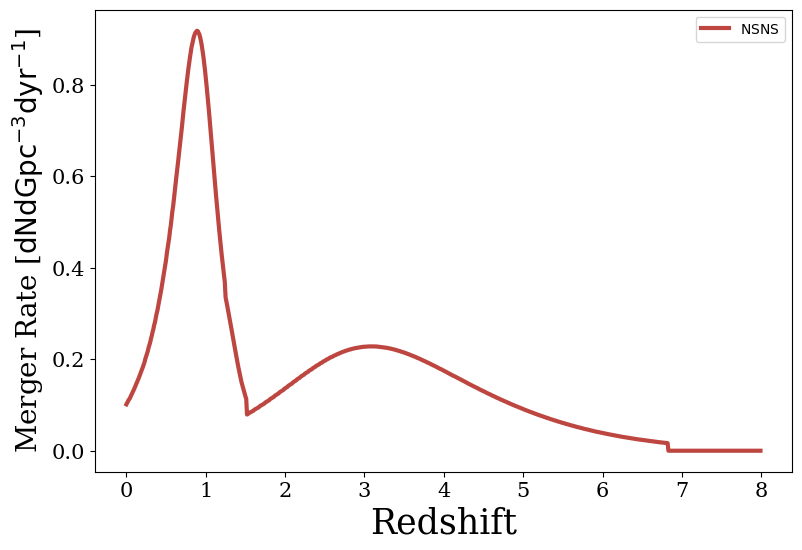

In [20]:
redshifts = redshifts
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],nsns_rate,linewidth=3,color='#BD4640',label=r'$\mathrm{NSNS}$') 

## axis
# plt.xlim(0,8)
# plt.ylim(10**0,5*10**5)
# plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

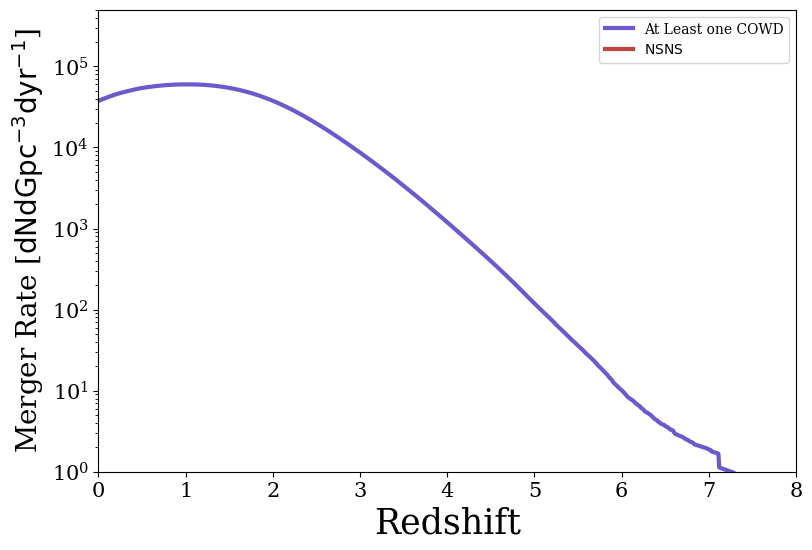

In [21]:
redshifts = redshifts
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],cowd_rate,linewidth=3,color='slateblue',label=r'At Least one COWD') # all COWD
plt.plot(redshifts[()],nsns_rate,linewidth=3,color='#BD4640',label=r'$\mathrm{NSNS}$') 

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

Let's now look at the rate for different selections for the system. Let's look at COWD with a main sequence M < 0.7 m_sol (0), main sequence M > 0.7 m_sol (1), naked helium main squence (7), naked helium (sub) giant (8), HeWD (10), COWD (11), ONeWD (12) and i am not sure what 9 is

In [51]:
# # let's create different dataframes for each of these companion cases

# # stellar type == 0
# low_mass_ms_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==0,DCO_data_masked['Stellar_Type(2)']==0)
# low_mass_ms_DATA = DCO_data_masked[low_mass_ms_bool]

# # stellar type == 1
# high_mass_ms_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==1,DCO_data_masked['Stellar_Type(2)']==1)
# high_mass_ms_DATA = DCO_data_masked[high_mass_ms_bool]

# # stellar type == 7
# helium_ms_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==7,DCO_data_masked['Stellar_Type(2)']==7)
# helium_ms_DATA = DCO_data_masked[helium_ms_bool]

# # stellar type == 8
# helium_subgiant_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==8,DCO_data_masked['Stellar_Type(2)']==8)
# helium_subgiant_DATA = DCO_data_masked[helium_subgiant_bool]

# # # stellar type == 9
# # helium_subgiant_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==9,DCO_data_masked['Stellar_Type(2)']==9)
# # helium_subgiant_DATA = DCO_data_masked[helium_subgiant_bool]

# # stellar type == 10
# hewd_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==10,DCO_data_masked['Stellar_Type(2)']==10)
# hewd_DATA = DCO_data_masked[hewd_bool]

# # stellar type == 11
# cowd_bool = np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Stellar_Type(2)']==11)
# cowd_DATA = DCO_data_masked[cowd_bool]

# # stellar type == 12
# onewd_bool = np.logical_or(DCO_data_masked['Stellar_Type(1)']==12,DCO_data_masked['Stellar_Type(2)']==12)
# onewd_DATA = DCO_data_masked[onewd_bool]


In [52]:
# merger_rate_0_bool = cowd_sn_bool*low_mass_ms_bool
# merger_rate_0 = np.sum(rates_WDWD[merger_rate_0_bool],axis=0)

In [53]:
# # gettign the mean merger rate per system for stellar type = 0
# merger_rate_0 = np.sum(rates_WDWD[low_mass_ms_bool*cowd_sn_bool],axis=0)


# # gettign the mean merger rate per system for stellar type = 1
# merger_rate_1 = np.sum(rates_WDWD[high_mass_ms_bool*cowd_sn_bool],axis=0)


# # gettign the mean merger rate per system for stellar type = 7
# merger_rate_7 = np.sum(rates_WDWD[helium_ms_bool*cowd_sn_bool],axis=0)


# # gettign the mean merger rate per system for stellar type = 8
# merger_rate_8 = np.sum(rates_WDWD[helium_subgiant_bool*cowd_sn_bool],axis=0)


# # gettign the mean merger rate per system for stellar type = 10
# merger_rate_10 = np.sum(rates_WDWD[hewd_bool*cowd_sn_bool],axis=0)


# # gettign the mean merger rate per system for stellar type = 11
# merger_rate_11 = np.sum(rates_WDWD[cowd_bool*cowd_sn_bool],axis=0)


# # gettign the mean merger rate per system for stellar type = 12
# merger_rate_12 = np.sum(rates_WDWD[onewd_bool*cowd_sn_bool],axis=0)


In [22]:
# let's add the flags for specific calssifications of SN Ia

SN_Ia_HVS,two_star_SNIA,Champagne_Supernova = useful_fncs.check_if_SNIA(DCO_COWD_data['Mass(1)'],DCO_COWD_data['Mass(2)'])
# adding the flags to the dataframe
DCO_COWD_data = DCO_COWD_data.assign(SN_Ia_HVS = SN_Ia_HVS)
DCO_COWD_data = DCO_COWD_data.assign(two_star_SNIA = two_star_SNIA)
DCO_COWD_data = DCO_COWD_data.assign(Champagne_Supernova = Champagne_Supernova)

In [23]:
rates_reshift_array = rates_DCO[carbon_oxygen_bool] # am i using the same rates 

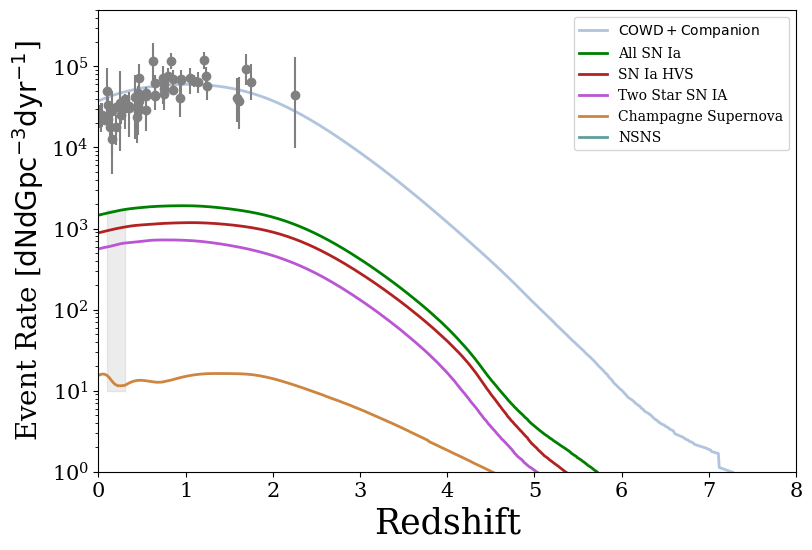

In [24]:
# disitninuish things merging before CE or after CE or due to GW

plt.figure(figsize=(9,6))
plt.plot(redshifts[()],cowd_rate,linewidth=2,color='lightsteelblue',label=r'$\mathrm{COWD + Companion}$') # all COWD

# different types of SN Ia
any_SNIA = np.logical_or(DCO_COWD_data['Champagne_Supernova']== True,
                         np.logical_or(DCO_COWD_data['SN_Ia_HVS']==True,DCO_COWD_data['two_star_SNIA']==True))
plt.plot(redshifts[()],np.sum(rates_reshift_array[any_SNIA,:],axis=0),linewidth=2,color='green',label='All SN Ia')

plt.plot(redshifts[()],np.sum(rates_reshift_array[SN_Ia_HVS,:],axis=0),linewidth=2,color='firebrick',label='SN Ia HVS')
plt.plot(redshifts[()],np.sum(rates_reshift_array[two_star_SNIA,:],axis=0),linewidth=2,color='mediumorchid',label='Two Star SN IA')
plt.plot(redshifts[()],np.sum(rates_reshift_array[Champagne_Supernova,:],axis=0),linewidth=2,color='peru',label='Champagne Supernova')

# NSNS Rate
plt.plot(redshifts[()],nsns_rate,linewidth=2,color='cadetblue',label='NSNS')



# sum of rates = 
#rates_sum = np.array(merger_rate_0) + np.array(merger_rate_1) + np.array(merger_rate_7) + np.array(merger_rate_8) + np.array(merger_rate_10) + np.array(merger_rate_11) + np.array(merger_rate_12)
#plt.plot(redshifts[()],rates_sum,linewidth=3,color='#BD4640',label=r'Sum of Rates') # stellar type = 12

# plt.plot(redshifts[()],merger_rate_11,linewidth=3,color='peru',label=r'$\mathrm{COWD + COWD}$') # stellar type = 11
# plt.plot(redshifts[()],merger_rate_10,linewidth=3,color='green',label=r'$\mathrm{COWD + HeWD}$') # stellar type = 10
# plt.plot(redshifts[()],merger_rate_12,linewidth=3,color='steelblue',label=r'$\mathrm{COWD + ONeWD}$') # stellar type = 12
# plt.plot(redshifts[()],merger_rate_8,linewidth=3,color='slateblue',label=r'$\mathrm{COWD + Naked}$ $\mathrm{He}$ $\mathrm{(Sub)}$ $\mathrm{Giant}$') # stellar type = 8

# plt.plot(redshifts[()],merger_rate_0,linewidth=3,color='#93B5C6',label=r'$\mathrm{COWD + Main Sequence}$ $\mathrm{M < 0.7 M_{\odot}}$') # stellar type = 0
# plt.plot(redshifts[()],merger_rate_1,linewidth=3,color='#DDEDAA',label=r'$\mathrm{COWD + Main Sequence}$ $\mathrm{M > 0.7 M_{\odot}}$') # stellar type = 1plt.plot(redshifts[()],merger_rate_7,linewidth=3,color='#F0CF65',label=r'$\mathrm{COWD + Naked}$ $\mathrm{He}$ $\mathrm{Main}$ $\mathrm{Sequence}$') # stellar type = 7

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = 'gray')#,label='Briel et al. 2020')

# NSNS rate
# plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=2,color='forestgreen')#,label=r'$\mathrm{BNS}$')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

# ## save figure:
# plt.savefig("redshift_rates_noRLOFpostce.png",bbox_inches='tight',pad_inches=0.1)

Let's make sure our rates are adding up properly when compared to the triangle plot

In [79]:
# adding the rates at redhsift zero
DCO_COWD_data = DCO_COWD_data.assign(WDWD_merger_rate_Z0 = rates_reshift_array[:,0])

In [80]:
print("SNIA HVS Merger rate:", np.sum(DCO_COWD_data['WDWD_merger_rate_Z0'][DCO_COWD_data['SN_Ia_HVS']== True]))
print("two_star_SNIA Merger rate:", np.sum(DCO_COWD_data['WDWD_merger_rate_Z0'][DCO_COWD_data['two_star_SNIA']== True]))
print("Champagne_Supernova Merger rate:", np.sum(DCO_COWD_data['WDWD_merger_rate_Z0'][DCO_COWD_data['Champagne_Supernova']== True]))
any_SNIA = np.logical_or(DCO_COWD_data['Champagne_Supernova']== True,
                         np.logical_or(DCO_COWD_data['SN_Ia_HVS']==True,DCO_COWD_data['two_star_SNIA']==True))
print("The sum of all three scenarios:", np.sum(DCO_COWD_data['WDWD_merger_rate_Z0'][any_SNIA]))

SNIA HVS Merger rate: 658.5008156302806
two_star_SNIA Merger rate: 456.97131119345687
Champagne_Supernova Merger rate: 21.431787629134227
The sum of all three scenarios: 1136.9039144528717


Let's now look at the delay time of the systems to see if these make sense

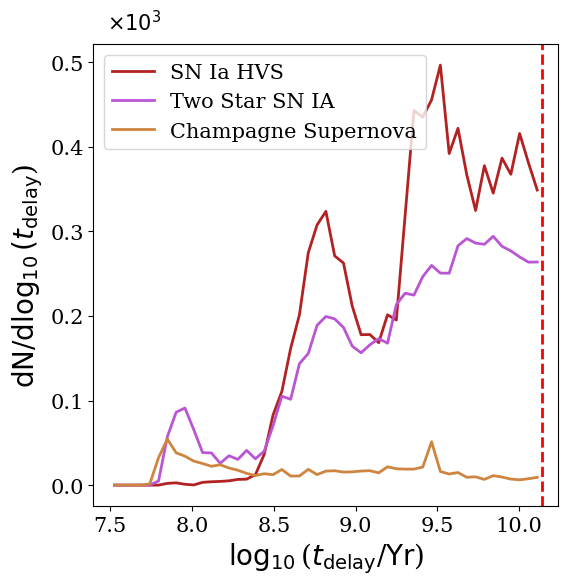

In [108]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution

## hubble time
age_universe = 13.7e9

fig, ax = plt.subplots(figsize=(6,6))

# ## all systems
# time_delay_log_all = np.log10((DCO_COWD_data['Time']*(1e6))+((DCO_COWD_data['Coalescence_Time']*(1e6))))
# hist_all, bin_edges_all = np.histogram(time_delay_log_all, weights=DCO_COWD_data['mixture_weight'],bins=np.linspace(7.5,np.log10(age_universe),50))
# center_bins_all = (bin_edges_all[:-1] + bin_edges_all[1:])/2
# bin_width_all = np.diff(bin_edges_all)

# plt.plot(center_bins_all,(hist_all/bin_width_all)*1e-3,color='lightsteelblue',lw=2, label=r'$\mathrm{COWD + Companion}$')

## SN_Ia_HVS
time_delay_log_SN_Ia_HVS = np.log10((DCO_COWD_data['Time'][DCO_COWD_data['SN_Ia_HVS']== True]*(1e6))+((DCO_COWD_data['Coalescence_Time'][DCO_COWD_data['SN_Ia_HVS']== True]*(1e6))))
hist_SN_Ia_HVS, bin_edges_SN_Ia_HVS = np.histogram(time_delay_log_SN_Ia_HVS, weights=DCO_COWD_data['mixture_weight'][DCO_COWD_data['SN_Ia_HVS']== True],bins=np.linspace(7.5,np.log10(age_universe),50))
center_bins_SN_Ia_HVS = (bin_edges_SN_Ia_HVS[:-1] + bin_edges_SN_Ia_HVS[1:])/2
bin_width_SN_Ia_HVS = np.diff(bin_edges_SN_Ia_HVS)

plt.plot(center_bins_SN_Ia_HVS,(hist_SN_Ia_HVS/bin_width_SN_Ia_HVS)*1e-3,color='firebrick',lw=2, label='SN Ia HVS')


## two_star_SNIA
time_delay_log_two_star_SNIA = np.log10((DCO_COWD_data['Time'][DCO_COWD_data['two_star_SNIA']== True]*(1e6))+((DCO_COWD_data['Coalescence_Time'][DCO_COWD_data['two_star_SNIA']== True]*(1e6))))
hist_two_star_SNIA, bin_edges_two_star_SNIA = np.histogram(time_delay_log_two_star_SNIA, weights=DCO_COWD_data['mixture_weight'][DCO_COWD_data['two_star_SNIA']== True],bins=np.linspace(7.5,np.log10(age_universe),50))
center_bins_two_star_SNIA = (bin_edges_two_star_SNIA[:-1] + bin_edges_two_star_SNIA[1:])/2
bin_width_two_star_SNIA = np.diff(bin_edges_two_star_SNIA)

plt.plot(center_bins_two_star_SNIA,(hist_two_star_SNIA/bin_width_two_star_SNIA)*1e-3,color='mediumorchid',lw=2, label='Two Star SN IA')


## SN_Ia_HVS
time_delay_log_Champagne_Supernova = np.log10((DCO_COWD_data['Time'][DCO_COWD_data['Champagne_Supernova']== True]*(1e6))+((DCO_COWD_data['Coalescence_Time'][DCO_COWD_data['Champagne_Supernova']== True]*(1e6))))
hist_Champagne_Supernova, bin_edges_Champagne_Supernova = np.histogram(time_delay_log_Champagne_Supernova, weights=DCO_COWD_data['mixture_weight'][DCO_COWD_data['Champagne_Supernova']== True],bins=np.linspace(7.5,np.log10(age_universe),50))
center_bins_Champagne_Supernova = (bin_edges_Champagne_Supernova[:-1] + bin_edges_Champagne_Supernova[1:])/2
bin_width_Champagne_Supernova = np.diff(bin_edges_Champagne_Supernova)

plt.plot(center_bins_Champagne_Supernova,(hist_Champagne_Supernova/bin_width_Champagne_Supernova)*1e-3,color='peru',lw=2, label='Champagne Supernova')






plt.text(0.03, 1.03, r'$\times 10^3$', fontsize = 15,  transform = ax.transAxes)

plt.xlabel(r"$\log_{10}$($t_{\mathrm{delay}}$/$\mathrm{Yr}$)",fontsize=20)
# plt.yscale('log')
# plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"$\mathrm{dN}$/$\mathrm{d}\log_{10}(t_{\mathrm{delay}}$)",fontsize=20) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.axvline(np.log10(age_universe), color='r', linestyle='--', linewidth=2)#,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
plt.legend(fontsize=15)

## save figure:
# plt.savefig("lifetime_distributions_COWD.pdf",bbox_inches='tight',pad_inches=0.1)

Let's look at the merger rate when the COWD is above 0.9 solar masses but below 1.4 solar masses

In [ ]:
sub_chandra_bool = np.logical_or(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']<1.4),np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Mass(2)']<1.4))
SUB_CHAN_DATA = DCO_data_masked[sub_chandra_bool]
SUB_CHAN_DATA

In [ ]:
# gettign the mean merger rate per system
total_merger_rate_sub_chan = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(SUB_CHAN_DATA[SUB_CHAN_DATA.columns[20+s]])
    total_merger_rate_sub_chan.append(tota_rate)

In [ ]:
redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_sub_chan,linewidth=3,color='#BD4640',label=r'$\mathrm{Sub-Chandrasekhar}$ $\mathrm{Systems}$') # all COWD
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

In [ ]:
# disitninuish things merging before CE or after CE or due to GW

redshifts = rates_info['redshifts']
plt.figure(figsize=(9,6))

plt.plot(redshifts[()],total_merger_rate_COWD,linewidth=3,color='#DDEDAA',label=r'$\mathrm{COWD + Companion]$') # all COWD + companion

# sum of rates = 
rates_sum = np.array(merger_rate_7) + np.array(merger_rate_8) + np.array(merger_rate_10) + np.array(merger_rate_11) + np.array(merger_rate_12)
plt.plot(redshifts[()],rates_sum,linewidth=3,color='grey',label=r'Sum of Rates') # stellar type = 12

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A')#,label='Briel et al. 2020')

# NSNS rate
plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')

## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

## save figure:
# plt.savefig("redshifts_rates_COWD_companion.pdf",bbox_inches='tight',pad_inches=0.1)

In [ ]:
# checking the length of the CE bool for the He Main Sequence
print(sum(helium_subgiant_DATA['Immediate_RLOF>CE']==True))
print(len(helium_subgiant_DATA))


Let's look at eh helium white dwarf first with these COWD

In [ ]:
hewd_DATA

In [ ]:
plt.hist(low_mass_ms_DATA['Mass(1)']+low_mass_ms_DATA['Mass(2)'])

In [ ]:
plt.hist(high_mass_ms_DATA['Mass(1)']+high_mass_ms_DATA['Mass(2)'])